# Antimicrobial Resistance Data Visualization

#### **Package Import**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
sns.set_style("whitegrid")

#### **Data Import**

In [31]:
df=pd.read_csv('Truncated.csv')

In [32]:
df.shape

(321, 19)

In [33]:
df.head()

,Isolate Id,Study,Species,Organism Group,Country,State,Gender,Age Group,Speciality,Source,In / Out Patient,Year,Phenotype,Amikacin,Amikacin_I,Amoxycillin clavulanate,Amoxycillin clavulanate_I,Ampicillin,Ampicillin_I
0,1000000.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,85 and Over,Emergency Room,GU: Urine,None Given,2013.0,NaN,8,Susceptible,>32,NaN,>32,NaN
1,1000001.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,13 to 18 Years,Emergency Room,HEENT: Ears,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
2,1000002.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,65 to 84 Years,Nursing Home / Rehab,GU: Urine,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
3,1000003.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,INT: Skin,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
4,1000004.0,TEST,Serratia marcescens,Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,CVS: Blood,None Given,2013.0,NaN,2,Susceptible,>32,Resistant,>32,Resistant


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Isolate Id                 320 non-null    float64 
 1   Study                      320 non-null    object  
 2   Species                    320 non-null    object  
 3   Organism Group             320 non-null    object  
 4   Country                    320 non-null    object  
 5   State                      0 non-null      float64 
 6   Gender                     317 non-null    object  
 7   Age Group                  320 non-null    object  
 8   Speciality                 320 non-null    object  
 9   Source                     320 non-null    object  
 10  In / Out Patient           320 non-null    object  
 11  Year                       320 non-null    float64 
 12  Phenotype                  146 non-null    object  
 13  Amikacin                   210 non-

In [34]:
#make the Amikacin column numeric
df['Amikacin'] = pd.to_numeric(df['Amikacin'], errors='coerce')
df.Amikacin.describe()

count    210.000000
mean       6.490476
std       14.136464
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       64.000000
Name: Amikacin, dtype: float64

In [35]:
#make the Amoxycillin clavunate column numeric
df['Amoxycillin clavulanate'] = pd.to_numeric(df['Amoxycillin clavulanate'], errors='coerce')
df['Amoxycillin clavulanate'].describe()

count    186.000000
mean       7.112366
std       10.469392
min        0.060000
25%        0.500000
50%        2.000000
75%        8.000000
max       32.000000
Name: Amoxycillin clavulanate, dtype: float64

In [14]:
#make the Ampicillin column numeric
df['Ampicillin'] = pd.to_numeric(df['Ampicillin'], errors='coerce')
df.Ampicillin.describe()

count    107.000000
mean       8.776449
std       10.576470
min        0.120000
25%        1.000000
50%        4.000000
75%       16.000000
max       32.000000
Name: Ampicillin, dtype: float64

#### **Summary Statistics**

In [15]:
df.columns

Index(['Isolate Id', 'Study', 'Species', 'Organism Group', 'Country', 'State',
       'Gender', 'Age Group', 'Speciality', 'Source', 'In / Out Patient',
       'Year', 'Phenotype', 'Amikacin', 'Amikacin_I',
       'Amoxycillin clavulanate', 'Amoxycillin clavulanate_I', 'Ampicillin',
       'Ampicillin_I'],
      dtype='object')

In [16]:
df.Amikacin.describe()

count    210.000000
mean       6.490476
std       14.136464
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       64.000000
Name: Amikacin, dtype: float64

In [18]:
df.groupby('Species').Amikacin.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Acinetobacter baumannii,13.0,52.307692,23.178239,4.0,64.00,64.0,64.0,64.0
Acinetobacter junii,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Acinetobacter lwoffii,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acinetobacter pitii,3.0,6.666667,8.082904,2.0,2.00,2.0,9.0,16.0
"Acinetobacter, non-speciated",4.0,1.750000,0.500000,1.0,1.75,2.0,2.0,2.0
Citrobacter freundii,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Enterobacter asburiae,2.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0
Enterobacter cloacae,20.0,3.750000,6.812334,1.0,2.00,2.0,2.0,32.0
Enterobacter kobei,5.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0


#### **Data Visualization**

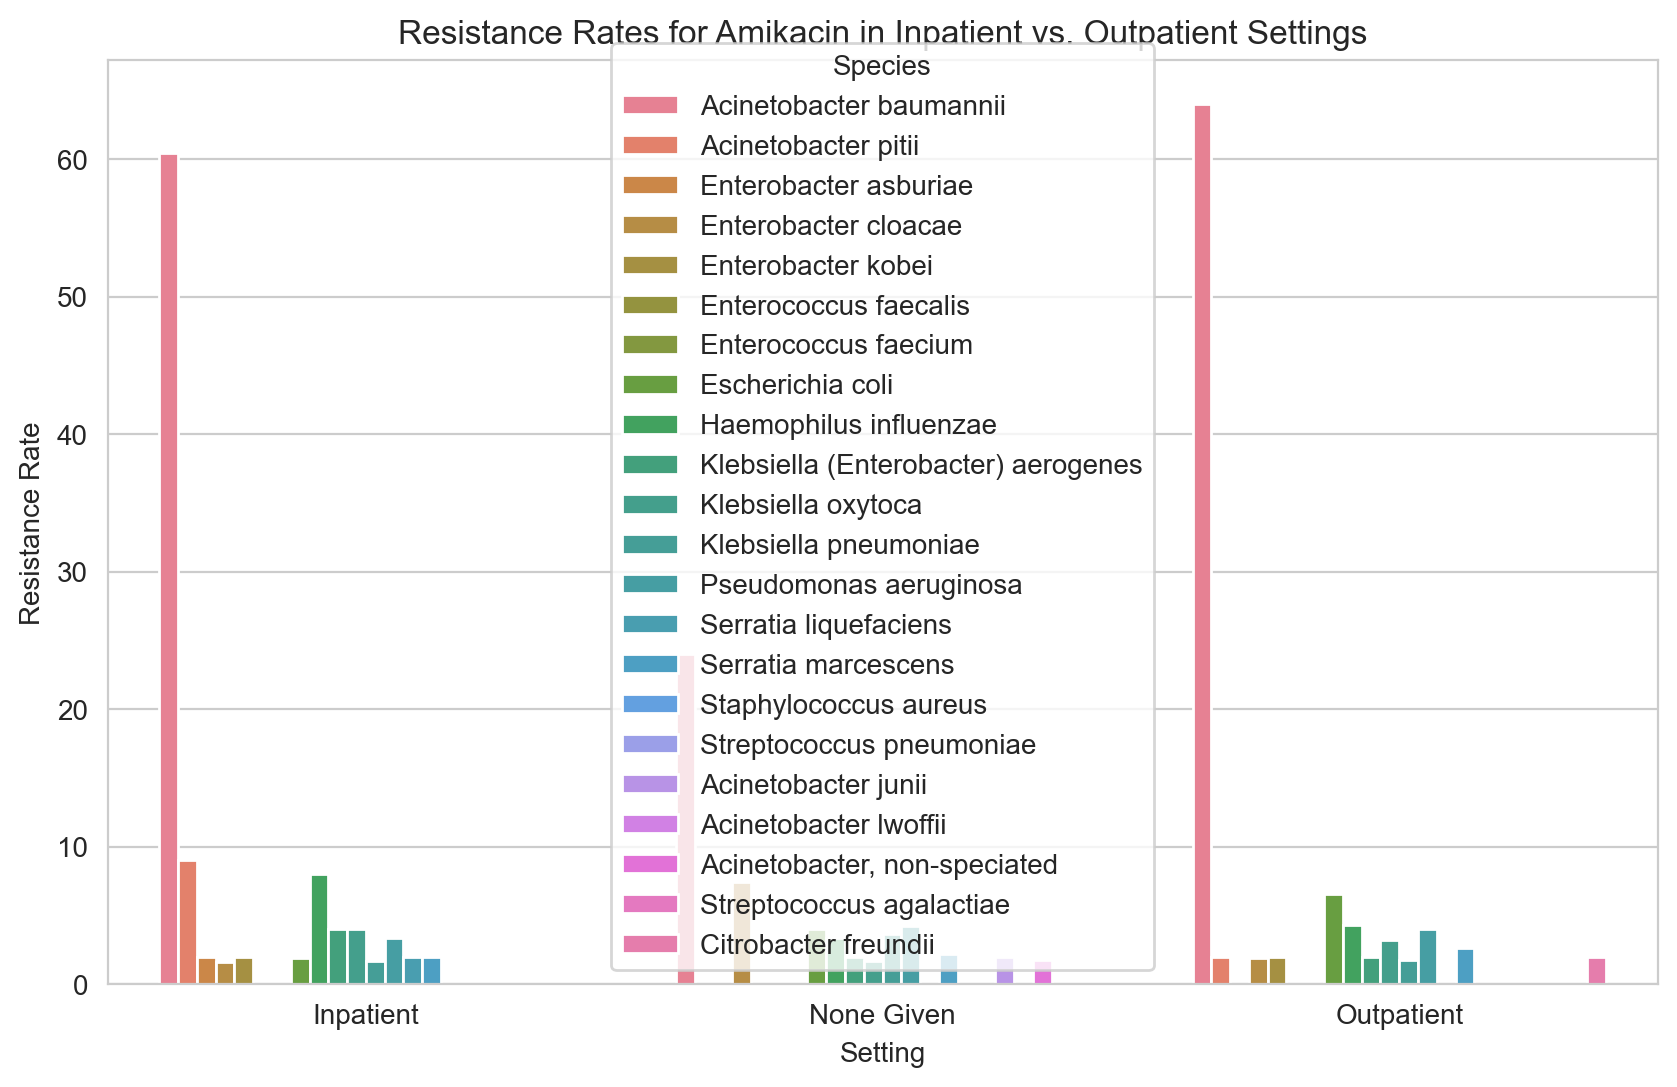

In [57]:
#create a A grouped bar chart showing the resistance rates for Amikacin in inpatient vs. outpatient settings.
df['In / Out Patient'] = df['In / Out Patient'].replace({'Inpatient': 'Inpatient', 'Outpatient': 'Outpatient'})
df['In / Out Patient'].unique()
# Create a new DataFrame with the resistance rates
resistance_rates = df.groupby(['In / Out Patient', 'Species'])['Amikacin'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='In / Out Patient', y='Amikacin', hue='Species', data=resistance_rates)
plt.title('Resistance Rates for Amikacin in Inpatient vs. Outpatient Settings')
plt.xlabel('Setting')
plt.ylabel('Resistance Rate')
plt.legend(title='Species')
plt.show()

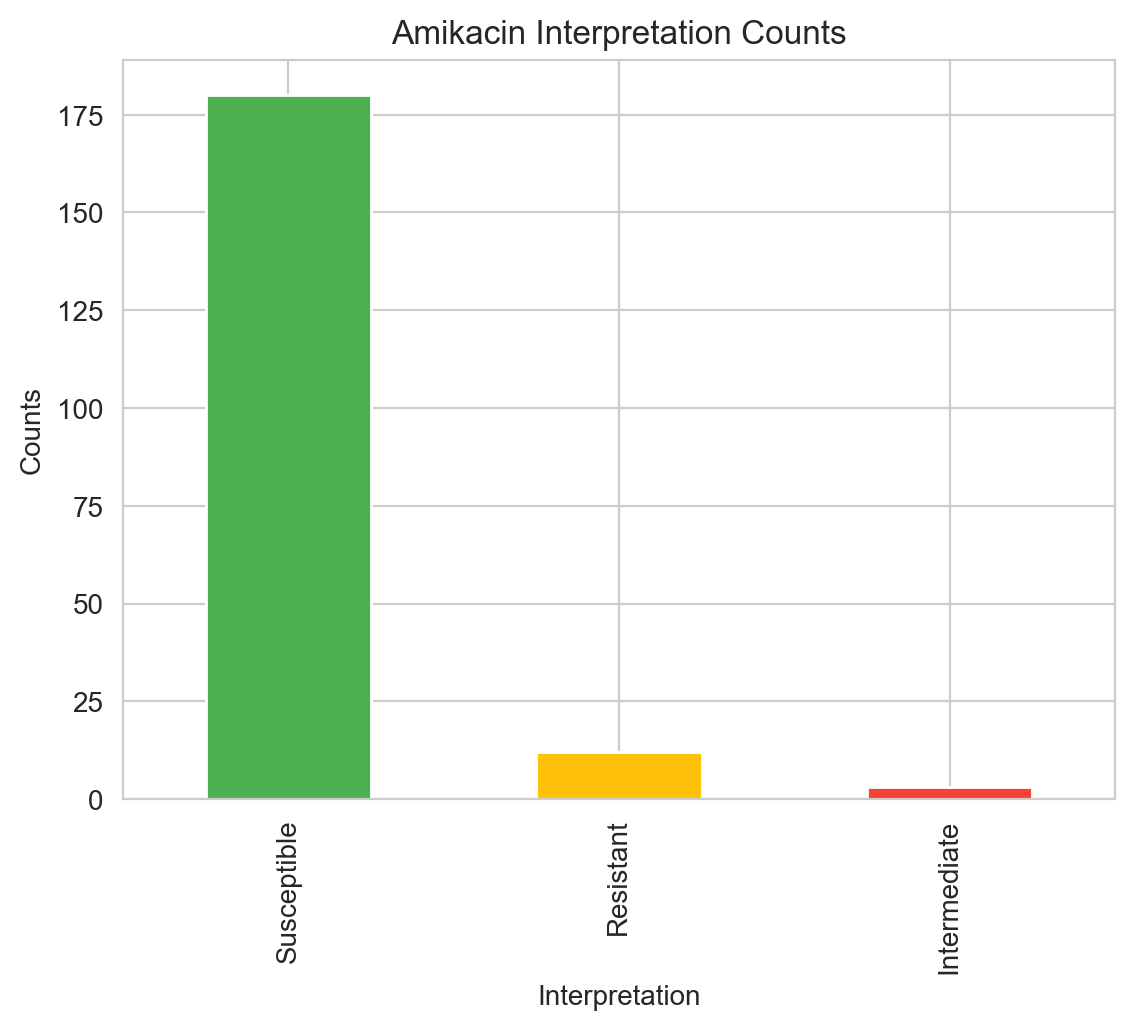

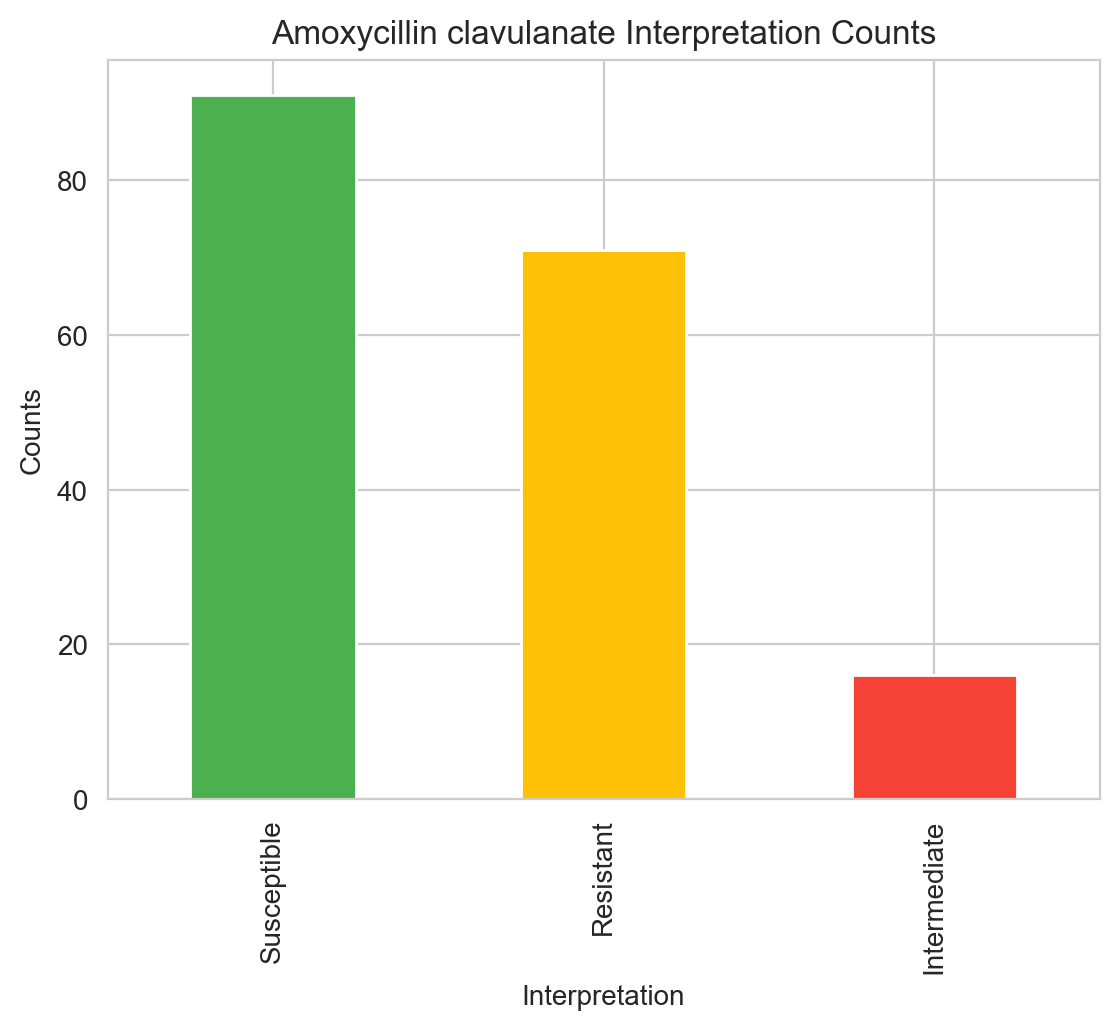

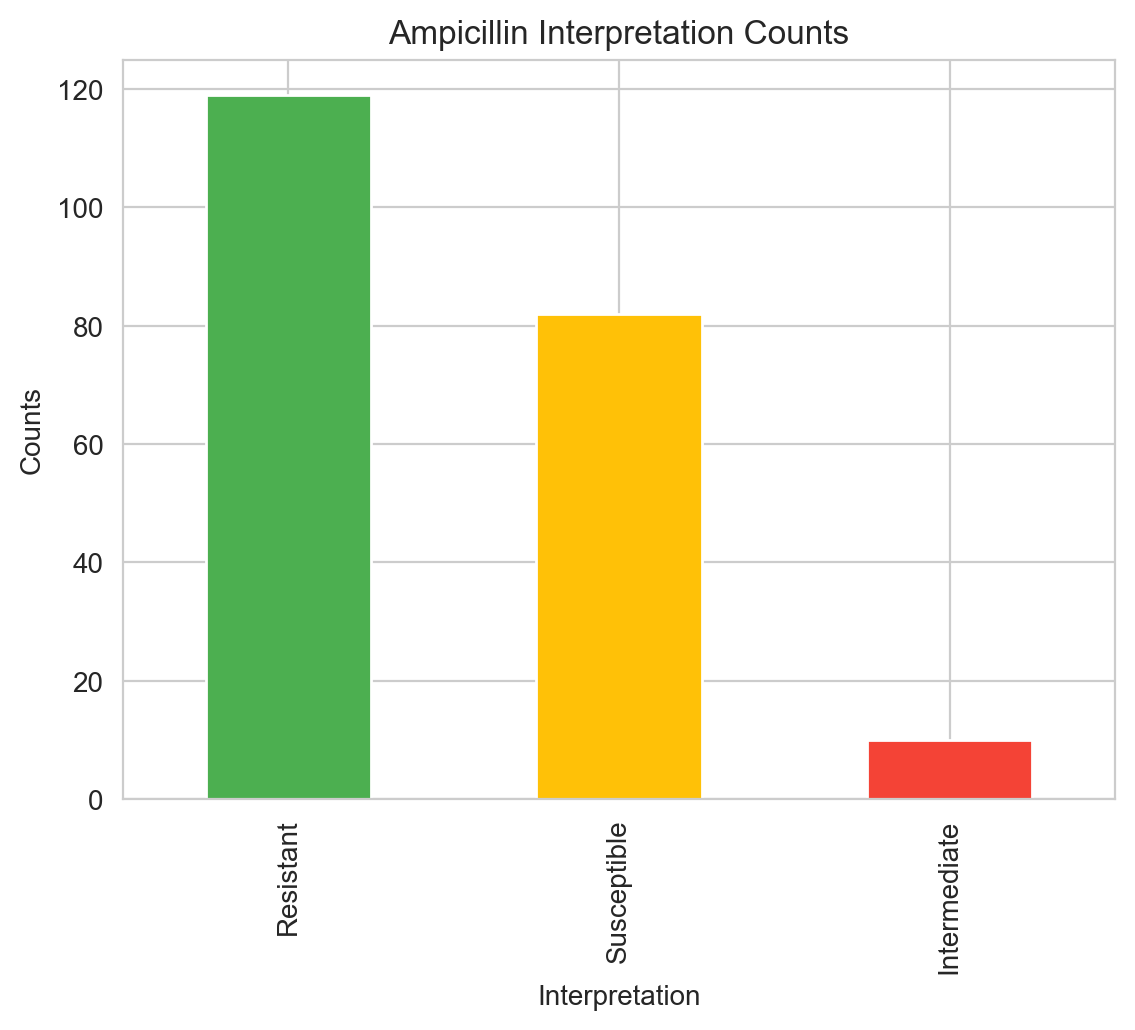

In [39]:
# make  A stacked bar chart displaying the counts of "Susceptible," "Intermediate," and "Resistant" for Amikacin
df['Amikacin_I'].value_counts()
# Create a stacked bar chart
ax = df['Amikacin_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Amikacin Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()
# Create a stacked bar chart for Amoxycillin clavulanate
df['Amoxycillin clavulanate_I'].value_counts()
# Create a stacked bar chart
ax = df['Amoxycillin clavulanate_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Amoxycillin clavulanate Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()
# Create a stacked bar chart for Ampicillin
df['Ampicillin_I'].value_counts()
# Create a stacked bar chart          
ax = df['Ampicillin_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Ampicillin Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()

/var/folders/r1/6fr5jm8s50q0qx3txnrlr9ym0000gn/T/ipykernel_11985/3588117760.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Species', columns='Amikacin_I', values='Amikacin', aggfunc='count')


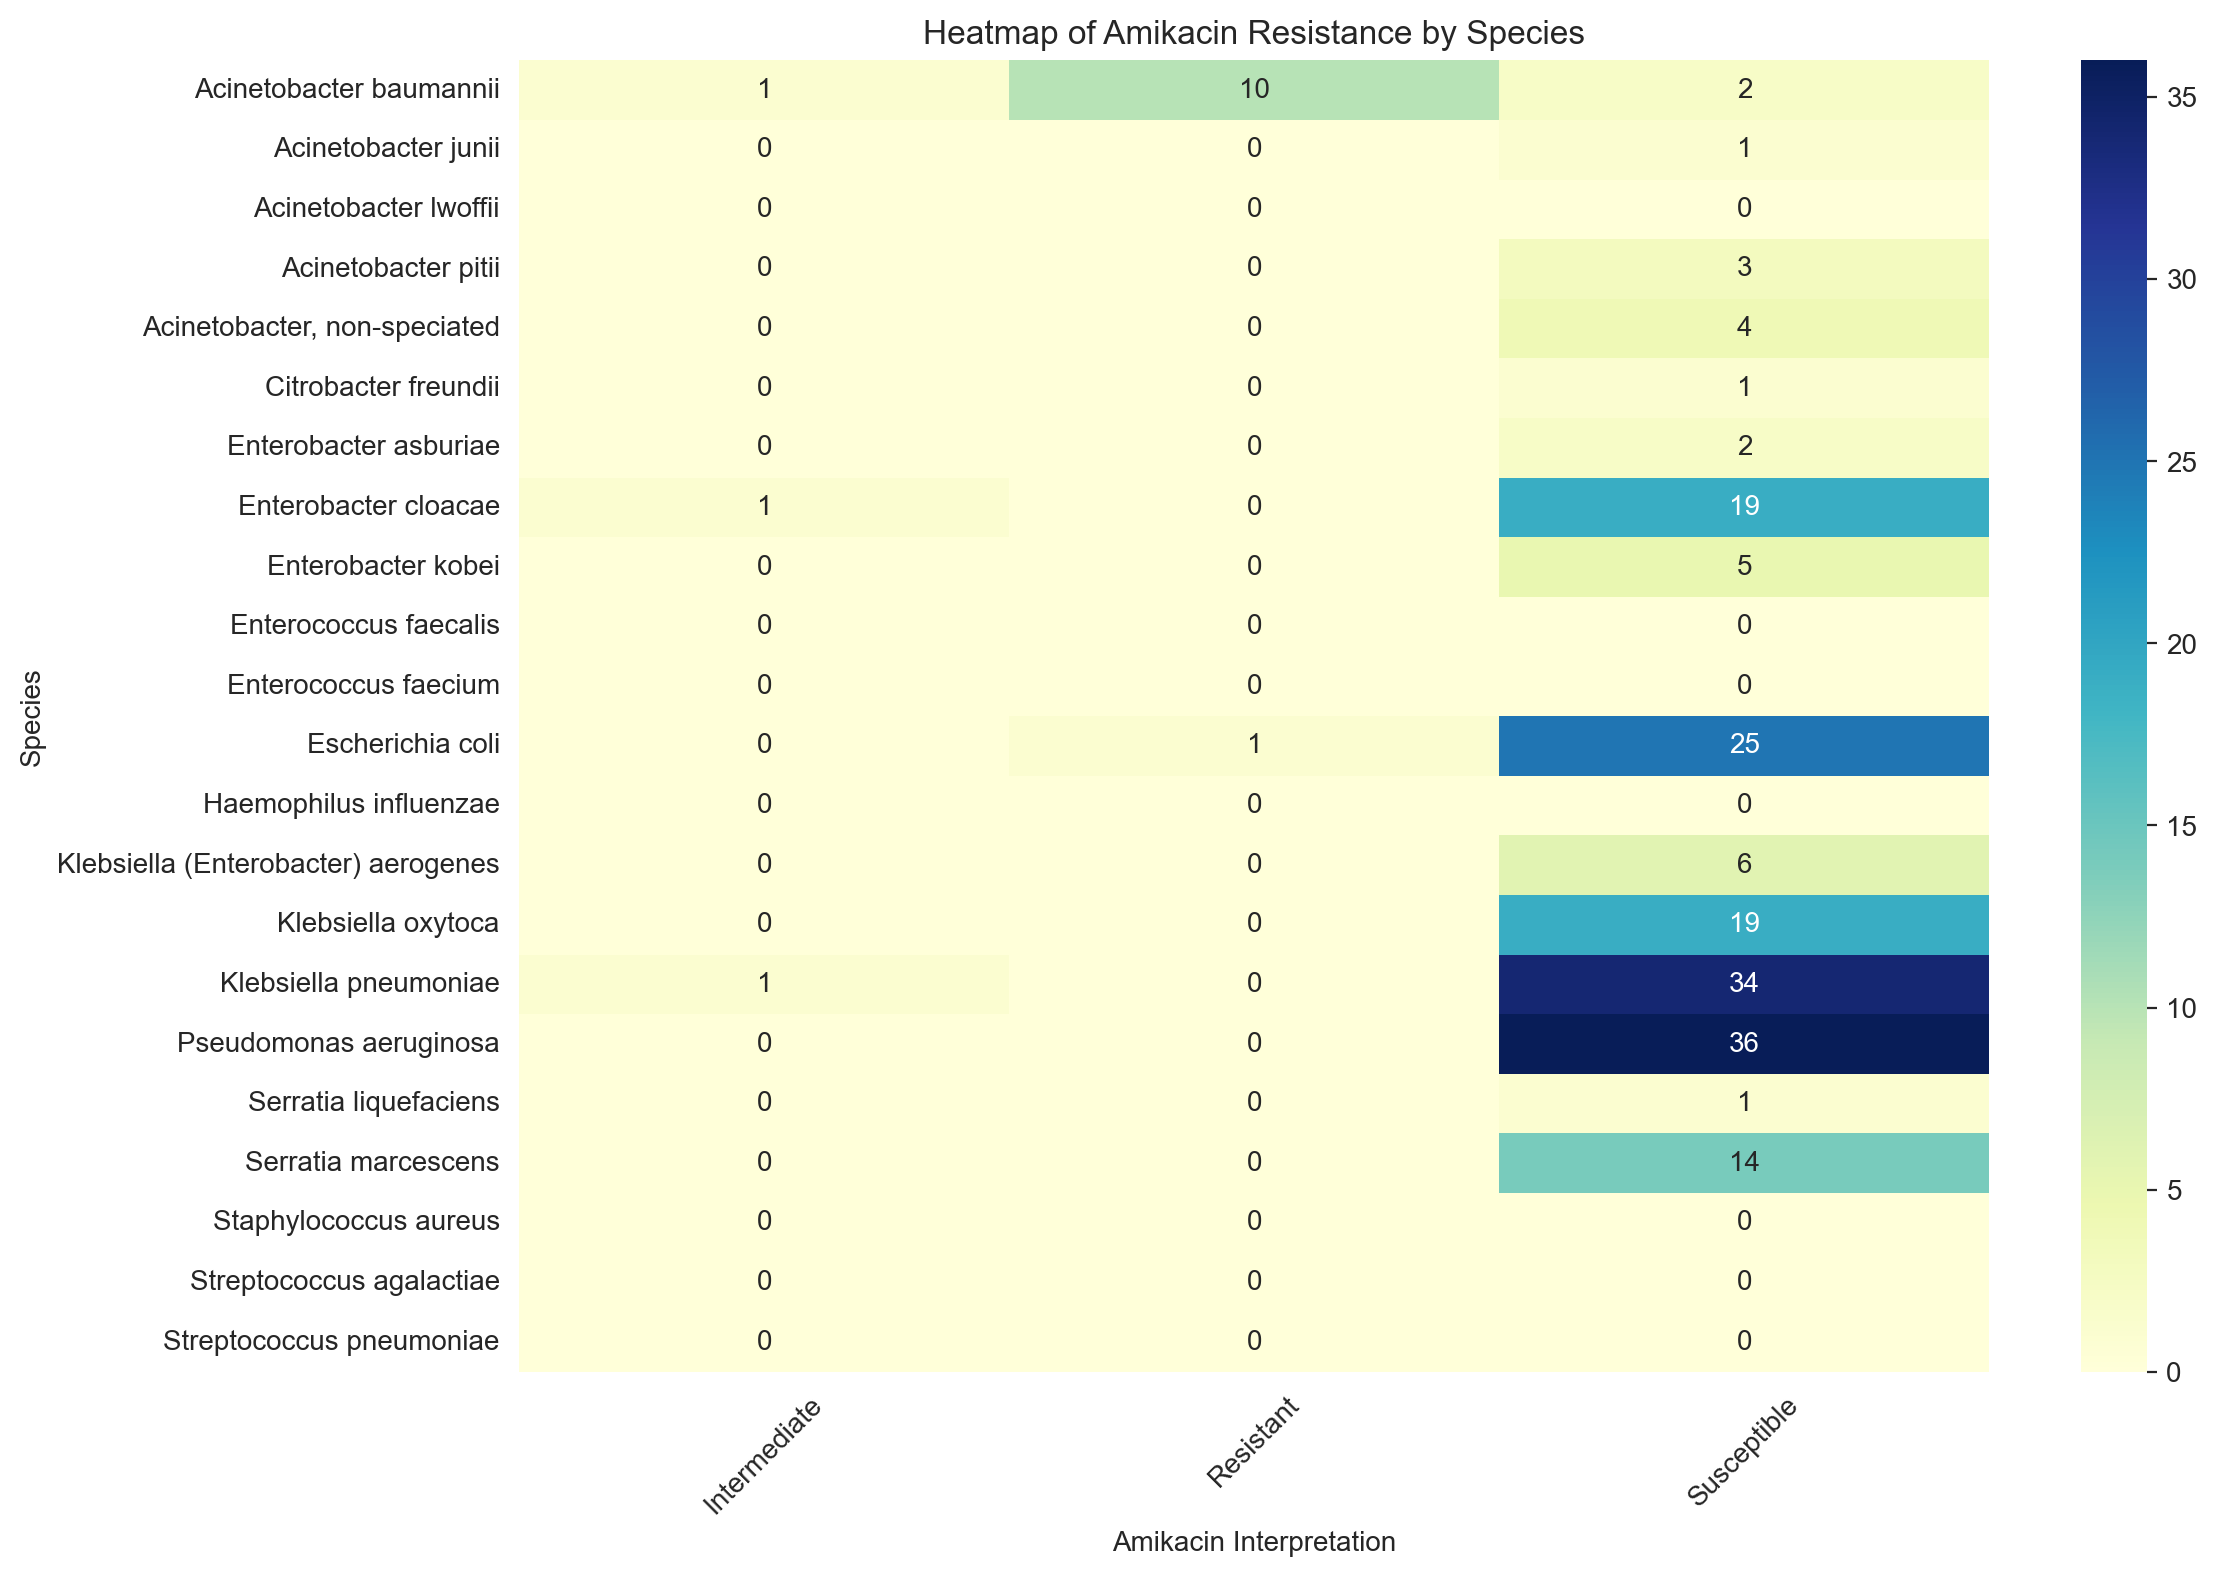

In [40]:
# create a heatmap where rows represent bacterial species, columns represent antibiotics, and cell colors indicate resistance levels.
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Species', columns='Amikacin_I', values='Amikacin', aggfunc='count')
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Amikacin Resistance by Species')
plt.xlabel('Amikacin Interpretation')
plt.ylabel('Species')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# Chapter 10 Quiz Questions

#### 1.How do you import the Seaborn package in Python?



**import seaborn**

#### 2.How do you create a scatter plot in Seaborn for variables x and y in a DataFrame df?



**seaborn.scatterplot(data=df, x='x', y='y')**


#### 3.How do you create a line plot in Seaborn for variables x and y in a DataFrame df?



**seaborn.lineplot(data=df, x='x', y='y')**

#### 4.How do you create a histogram in Seaborn for a variable x in a DataFrame df?



**seaborn.histplot(df, x='x')**


#### 5. How do you create a stacked histogram in Seaborn for variables x and 'hue' y in a DataFrame df?



**seaborn.displot(df, x='x', hue='y', multiple='stack')**

#### 6. How do you create a heatmap in Seaborn for a variable x and y in a DataFrame df?



**seaborn.displot(df, x='x', y='y', cbar=True)** or **seaborn.heatmap(data=df)**

#### 7. How do you create a box plot in Seaborn for variables x and y in a DataFrame df?



**seaborn.boxplot(data=df, x='x', y='y')**

#### 8. How do you create a violin plot in Seaborn for variables x and y in a DataFrame df?



**seaborn.violinplot(data=df, x='x', y='y')**

#### 9. How do you create a bar plot in Seaborn for variables x and y in a DataFrame df?



**seaborn.barplot(data=df, x='x', y='y')**


#### 10. How do you add a title to a Seaborn plot assigned to the variable ax with the title 'My Title'?



**ax.set(title='My Title')**

#### 11. How do you save a Seaborn plot ax to a file named 'output.png'?



**ax.set(xlabel='X Label', ylabel='Y Label')**


#### 12. How do you set the x and y axis labels to 'X Label' and 'Y Label' respectively for a Seaborn plot ax?



**ax.set(xlabel='X Label', ylabel='Y Label')**

#### 13. How do you change the color palette of a Seaborn plot to 'Blues'?



**sns.set_palette('Blues')**

#### 14. How do you display a Seaborn plot with a logarithmic scale on the y-axis?



**ax.set(yscale='log')**

#### 15. How do you add a regression line to a scatter plot in Seaborn for variables x and y in a DataFrame df?



**sns.regplot(data=df, x='x', y='y')**
